In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('../data/lupus_dataset_full.csv')
df.head()

,ana,fever,leukopenia,thrombocytopenia,auto_immune_hemolysis,delirium,psychosis,seizure,non_scarring_alopecia,oral_ulcers,...,proteinuria,renal_biopsy_class,anti_cardioliphin_antibodies,anti_b2gp4_antibodies,lupus_anti_coagulant,c3,c4,anti_dsdna_antibody,anti_smith_antibody,label
0,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,0.56807,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0


In [6]:
len(df)

100000

<AxesSubplot:ylabel='Density'>

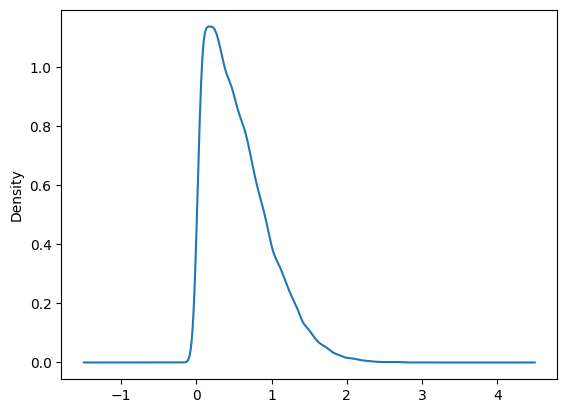

In [7]:
df['proteinuria'].plot(kind='kde')

<AxesSubplot:title={'center':'Lupus Class Distribution'}, xlabel='label', ylabel='count'>

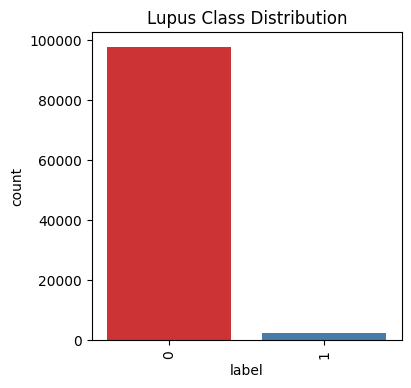

In [3]:
plt.figure(figsize=(4, 4))
plt.xticks(rotation=90)
plt.title('Lupus Class Distribution')
sns.countplot(x='label', data=df, palette = 'Set1')

In [12]:
def plot_feature_frequencies(df):
    output_df  = pd.DataFrame()
    for col in df.columns:
        if col != 'label':
            missing_num = df.isna().sum()[col]
            present_num = df.notna().sum()[col]
            col_dict = {'feature name':col, 'present': present_num, 'missing':missing_num,}
            output_df = output_df.append(col_dict, ignore_index=True)
    output_df = output_df[['feature name', 'present', 'missing']]
    output_df.plot(x='feature name', kind='bar', figsize=(6,4), stacked=True, title='Proportion of Missing Values')
    return output_df

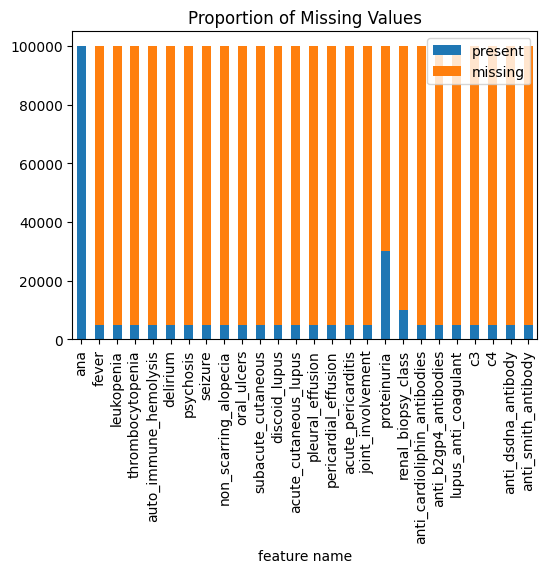

In [13]:
output_df = plot_feature_frequencies(df)